In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
%matplotlib notebook

In [3]:
#Plan: Autocorrelation function 

#http://www.sciencedirect.com/science/article/pii/S0921509304004253#

In [4]:
## Raw data analysis

df=pd.read_csv('D:\\data\\tomography\\retomographydata\\cords_tab.txt', sep="\t",header=None, engine='python')

df2 =pd.read_csv('D:\\data\\tomography\\retomographydata_simplecubic\\coords_full_SimpleCubic.txt', sep="\s+",header=None, engine='python')


#Axes3D.scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)

In [5]:
df2.head(5)

,0,1,2,3
0,917.187683,649.051147,114.567970,209
1,1013.011169,391.986755,395.852051,164
2,1031.788940,508.789490,506.423126,163
3,1097.575317,1002.688538,630.750244,161
4,945.782898,750.220703,132.229095,154


In [6]:
#df2.info

In [7]:
x,y,z= df[0],df[1],df[2]
x1,y1,z1 = df2[0],df2[1],df2[2]

<IPython.core.display.Javascript object>


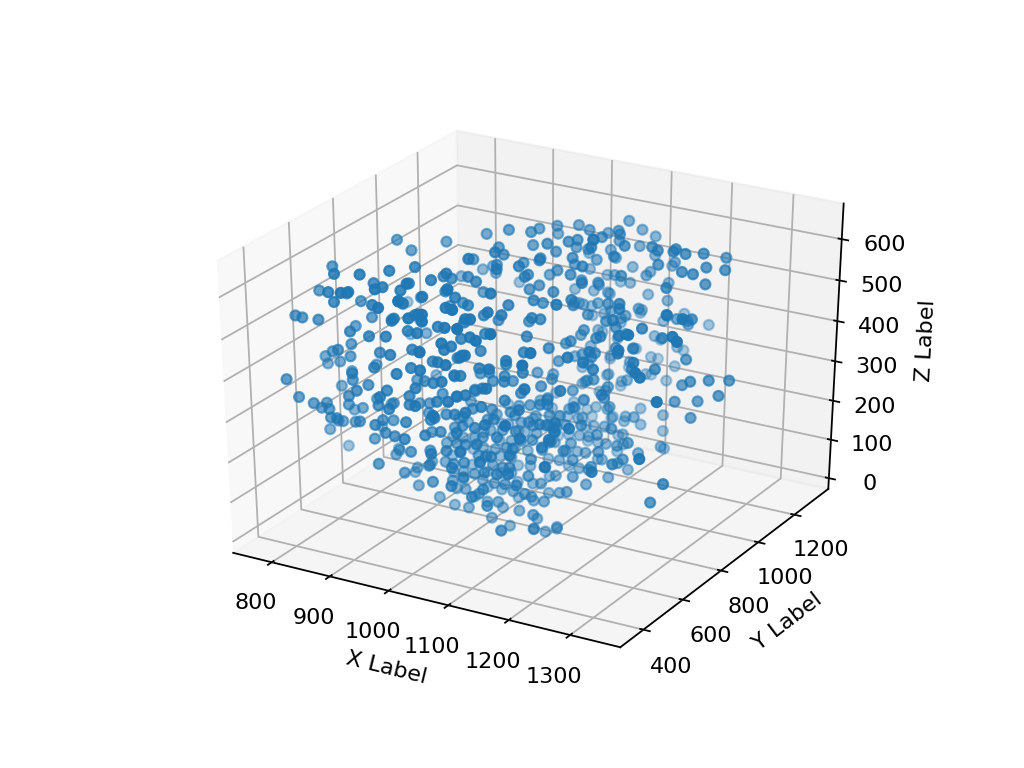

In [9]:
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.scatter(df2[0],df2[1], df2[2])

In [9]:
#Lattice Parameter
#get a histogram of the data

len(x1)

for i in range(len(x1)):
    dist = np.sqrt((x1[0]-x1[1])**2+(y1[0]-y1[1])**2+(z1[0]-z1[1])**2)
    

In [10]:
particle =[]
for i in range(len(x1)):
    particle = np.append(particle, np.array([df2[0][i],df2[1][i],df2[2][i]]))
    
print('size of array %d' % len(particle))
#df2[0][0]

size of array 2040


In [11]:
a =np.array([df2[0][0],df2[1][0],df2[2][0]])


In [12]:
particle

array([  917.187683,   649.051147,   114.56797 , ...,  1150.970215,
         993.889893,   634.032043])

In [13]:
def dist(x,y,r):
    """x and y are the data sets, r is the radius we care about"""
    dist = np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2+(x[2]-y[2])**2)
    if dist <= r:
        result = dist
    else:
        result = np.nan
    return result

In [14]:
dist(df2.iloc[0],df2.iloc[1],350)

nan

In [15]:
def dist_all_neighbors(x,y,r):
    result = [0,0]
    if len(x)==len(y):
        print('data looks good')
        for i in range(3):
            for j in range(len(y)):
                 result =np.vstack((result,np.array([i,dist(x.iloc[i],y.iloc[j],r)])))
    return result

In [34]:
result_func = dist_all_neighbors(df2,df2,150)

data looks good


In [35]:
result_func

array([[  0.,   0.],
       [  0.,   0.],
       [  0.,  nan],
       ..., 
       [  2.,  nan],
       [  2.,  nan],
       [  2.,  nan]])

In [36]:
df3 = DataFrame(result_func)



In [37]:
df4=df3.dropna(axis=0,how='any')

In [38]:
df4.median(axis=0)

0      1.000000
1    107.772317
dtype: float64

<IPython.core.display.Javascript object>


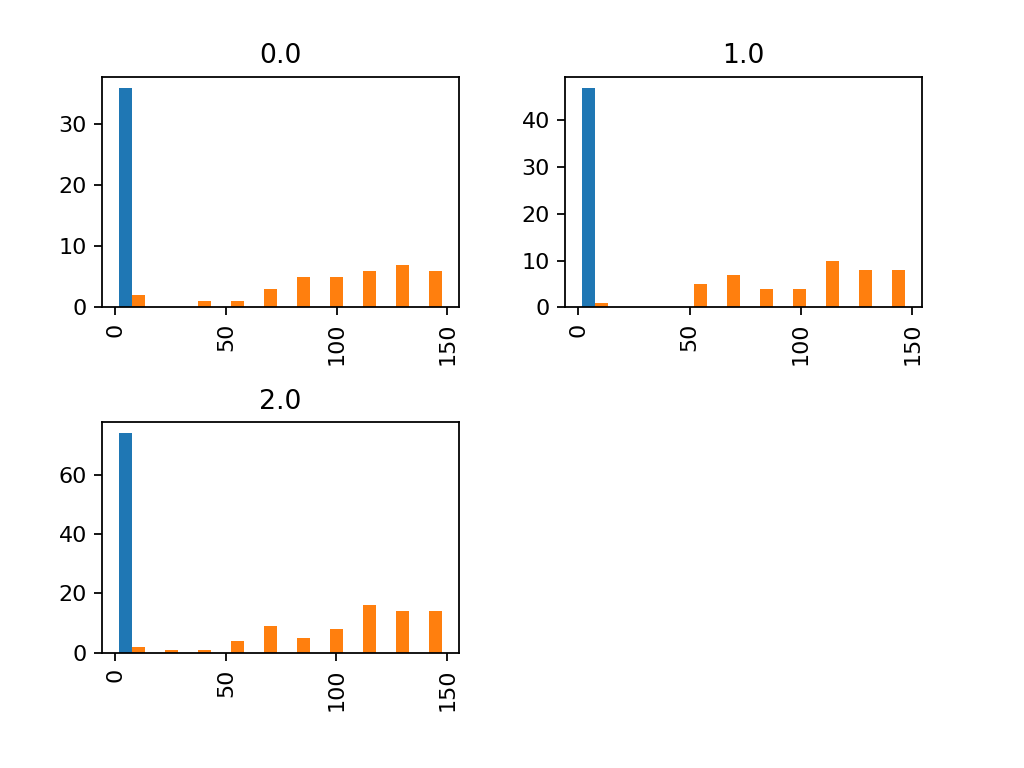

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2AE53EB38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E2AEC9FBA8>]], dtype=object)

In [42]:
df4.hist(by=df4[0],bins=10)

In [72]:
correlation_1 = np.correlate(df2.iloc[1],df2.iloc[4], mode='valid')

In [73]:
correlation_1

array([ 1329764.3764836])

In [ ]:
"""
def estimated_autocorrelation(x):
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = N.correlate(x, x, mode = 'full')[-n:]
    #assert N.allclose(r, N.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(N.arange(n, 0, -1)))
    return result
"""

In [ ]:
#kdtree

from scipy.spatial import KDTree
import matplotlib.pyplot as plt
tree = KDTree(df2,leafsize=10)


In [ ]:
tree.query_ball_point([tree.data[0]], 100)

In [ ]:
tree.data[102]-tree.data[0]

In [ ]:
dist, ind = tree.query([tree.data[0]],k=680)

np.average(dist)



In [ ]:
result =tree.query_ball_tree(tree,50)


print(tree.data[0], tree.data[370])

dist(tree.data[0],tree.data[370])

In [ ]:
tree.data[0]

In [ ]:
df2[1:2]

In [ ]:
df2.iloc[1]

for i in range(3):
    print(df2.iloc[i])



In [ ]:
tree.query(tree.data[40])

In [ ]:
result=[0,0]
for i in np.arange(0,50):
    r=tree.count_neighbors(tree,i)
    result = np.vstack((result,np.array([i,r]))

In [ ]:
b=np.vstack([a,b])

In [ ]:
#example 3d data code

def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [ ]:
# Mean Displacement


In [ ]:
# Correlation Length

In [ ]:
#Domains